<a href="https://colab.research.google.com/github/babsyco/Background_infraredLight_filtering/blob/main/amp_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Amplifier Using TL072CP Op-Amp

TL072 datasheet available [here](https://pdf1.alldatasheet.com/datasheet-pdf/view/28807/TI/TL072CP/+Q7JQ8UPGZylJvBhu+/datasheet.pdf). Key information:
<body>
  <br>
  <figure>
    <img src="https://drive.google.com/uc?export=download&id=1Av0jm_W0fbv8bFI1Cc_obmsVWkdkcOSW" width="300" align="middle">
  </figure>
<br>
</body>

<body>
  <br>
  <center>
  <figure>
    <img src="https://drive.google.com/uc?export=download&id=1CyAOR6e4VkvWwy1_OXRMMHEcN4nN7J44" width="800" align="middle">
  </figure>
  </center>
<br>
</body>

<body>
  <br>
  <center>
  <figure>
    <img src="https://drive.google.com/uc?export=download&id=1UA3kTbCGNIbgNg6WC6OL4VGrpJSzWGEh" width="800" align="middle">
  </figure>
  </center>
<br>
</body>

<body>
  <br>
  <center>
  <figure>
    <img src="https://drive.google.com/uc?export=download&id=1en9XpABrMNkI0I0pGms4EtfBG4BBuqLA" width="800" align="middle">
  </figure>
  </center>
<br>
</body>

## Configurations
### Non-Inverting
<body>
  <figure>
    <img src="https://drive.google.com/uc?export=download&id=170JYQu7XQIdO1YUvkTfyyvnyPvOLybPs" width="300" align="middle">
  </figure>
<br>
</body>

### Unity-Gain
<body>
  <figure>
    <img src="https://drive.google.com/uc?export=download&id=1N_ZRn0CpZh0V5SiR6kIof86qOD6BMZtT" width="350" align="middle">
  </figure>
<br>
</body>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from urllib import request
from google.colab import files

In [2]:
###################
# RESISTOR VALUES #
###################
TL072CP_resistor_values = ["R1 = 100.0, R2 = 47.0", "R1 = 28.4, R2 = 36.1", "R1 = 0.0, R2 = float('inf')"]
AS358CP_resistor_values = ["R1 = 28.2, R2 = 36.1", "R1 = 0.0, R2 = float('inf')"]

print("\nSELECT DATASET BY ENTERING OP-AMP AND RESISTOR VALUES IN THE NEXT CELL")
# TL072CP op-amp
print("\n Resistor Values For TL027CP Datasets:")
for vals in TL072CP_resistor_values:
  print("  "+vals)

# AS358P op-amp
print("\n Resistor Values For AS358P Datasets:")
for vals in AS358CP_resistor_values:
  print("  "+vals)


SELECT DATASET BY ENTERING OP-AMP AND RESISTOR VALUES IN THE NEXT CELL

 Resistor Values For TL027CP Datasets:
  R1 = 100.0, R2 = 47.0
  R1 = 28.4, R2 = 36.1
  R1 = 0.0, R2 = float('inf')

 Resistor Values For AS358P Datasets:
  R1 = 28.2, R2 = 36.1
  R1 = 0.0, R2 = float('inf')


In [3]:
#####################
# IMPORT/CLEAN DATA #
#####################

################ USER-DEFINED VALUES ###################
# Enter values below to pull the corresponding dataset
opAmp = 'AS358P' #'TL072CP', 'AS358P'
R1 = 28.2 #Kohm, 1 decimal place
R2 = 36.1 #Kohm, 1 decimal place, or float('inf')
Vcc_pos = 5
Vcc_neg = 0
amp_config = 'Non-Inverting'
########################################################

# theoretical gain
if (R2 != 0):
  gain_theoretic = 1 + (R1/R2)
else:
  gain_theoretic = 1

# Import data
dataset_key = '%s %.1f %.1f' % (opAmp, R1, R2)
amp_data_URLs = {'TL072CP 28.4 36.1':'https://drive.google.com/uc?export=download&id=148sAkcQFtZjshzghTm-DtewOf73f4DKd',
                'TL072CP 0.0 inf':'https://drive.google.com/uc?export=download&id=1XtyQerlQTxso0PIVVKiNxp-OFlje1ajE',
                 'TL072CP 100.0 47.0':'https://drive.google.com/uc?export=download&id=1H_1FBTSAjmdxeL53YBNRGcITZsZj9zvN',
                 'AS358P 28.2 36.1':'https://drive.google.com/uc?export=download&id=1jngkFb317FhZrhWRLPDPrgHuD9iGY7my',
                 'AS358P 0.0 inf':'https://drive.google.com/uc?export=download&id=1TQeZVoagNBzdHuN8ilZKNE0OW07SDBS7' 
                }
amp_data_df = pd.read_csv(amp_data_URLs[dataset_key], error_bad_lines=False)

# Get name of imported file
dataset_filename = request.urlopen(request.Request(amp_data_URLs[dataset_key])).info().get_filename()
# Drop duplicate rows
raw_shape = amp_data_df.shape
amp_data_df.drop_duplicates(inplace=True)

# Sort by Vin ascending
amp_data_df.sort_values(by="Vin", inplace=True)

# Add gain column
amp_data_df["gain"] = (amp_data_df["Vout"]/amp_data_df["Vin"])
# replace gain values > 5 with Nan
#amp_data_df['gain'] = amp_data_df['gain'].apply(lambda x: np.nan if x > 5 else x)
cleaned_shape = amp_data_df.shape

# Display dataset summary
print("\nDATASET SUMMARY:\n")
print(' Filename: %s' % dataset_filename)
print('\n Random Sample of Dataset:\n')
display(amp_data_df.sample(n=10))
print("\nDimensions: %d rows, %d columns" % tuple(cleaned_shape))
print("(%d duplicate rows dropped.)" % (raw_shape[0] - cleaned_shape[0]))


DATASET SUMMARY:

 Filename: AS358P_28_2_36_1.csv

 Random Sample of Dataset:



,Vin,Vout,gain
1034,4.00,3.67,0.917500
4569,0.87,1.58,1.816092
3777,3.06,3.68,1.202614
1049,4.06,3.66,0.901478
1842,0.08,0.15,1.875000
3322,1.87,3.36,1.796791
1605,2.58,3.67,1.422481
858,3.26,3.68,1.128834
5298,3.24,3.66,1.129630
2384,3.12,3.68,1.179487



Dimensions: 972 rows, 3 columns
(5061 duplicate rows dropped.)


In [4]:
##################################
# SORT/ANALYSE DATA FOR PLOTTING #
##################################

SD_window = 10

hardware_vals = (R1, R2, Vcc_pos, Vcc_neg, gain_theoretic)

# get min/max Vout indices.
min_V_index = [i for i, j in enumerate(list(amp_data_df["Vout"])) if j == amp_data_df["Vout"].min()][0]
max_V_index = [i for i, j in enumerate(list(amp_data_df["Vout"][min_V_index:])) if j == amp_data_df["Vout"].max()][0] + min_V_index

# get data
stop_index = max_V_index + int(0.05*cleaned_shape[0])
Vin_data = list(amp_data_df["Vin"])[:stop_index]
Vout_data = list(amp_data_df["Vout"])[:stop_index]
gain_data = list(amp_data_df["gain"])[:stop_index]
# x_vals has to be created using len(gain_data), not stop_index. Reason:
# len(gain_data) might be less than stop index, if stop index is > row of amp_data_df.
x_vals = [x for x in range(len(gain_data))]

# get min/max values
min_V_index_Vin = Vin_data[min_V_index]
min_V_index_Vout = Vout_data[min_V_index]
max_V_index_Vin = Vin_data[max_V_index]
max_V_index_Vout = Vout_data[max_V_index]

# get running sample deviation from centered %d-sample mean window
gain_devFromMean_data = [np.nan]*int(SD_window/2)
gain_windowedMean_data = [np.nan]*int(SD_window/2)
for i in range(len(gain_data) - int(SD_window/2)):
  windowed_mean = np.mean(gain_data[i:i+SD_window])
  gain_windowedMean_data.append(windowed_mean)
  gain_devFromMean_data.append(gain_data[i+int(SD_window/2)] - windowed_mean)

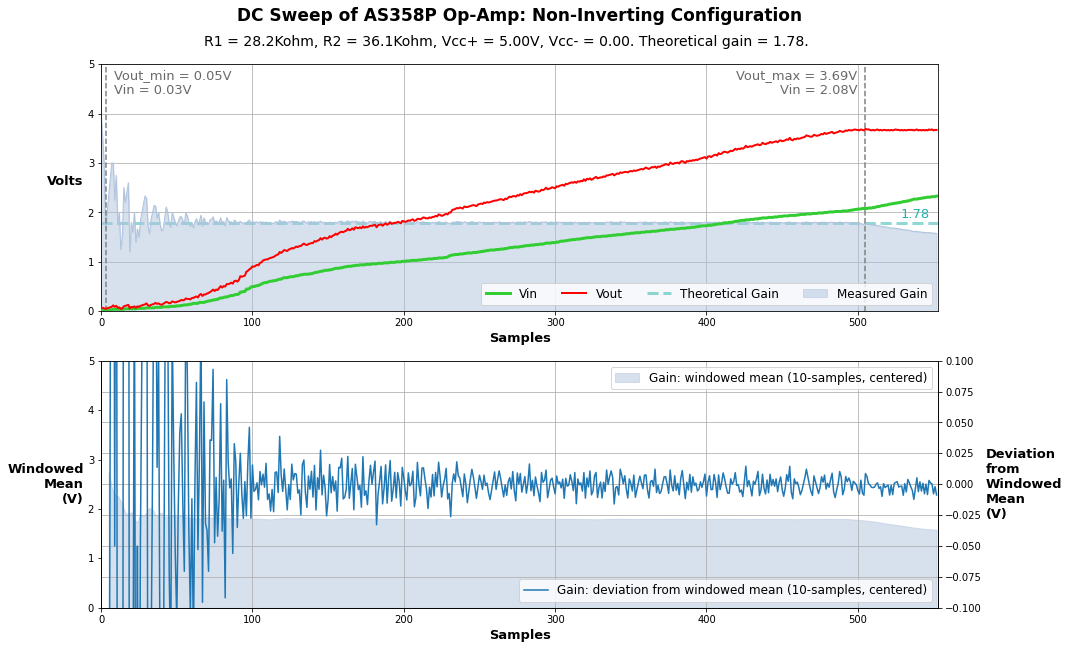

In [5]:
#############
# PLOT DATA #
#############

gain_color = 'lightsteelblue'
input_color = 'limegreen'
output_color = 'red'
ylim_top = Vcc_pos
ylim_bottom = Vcc_neg

# TOP PLOT: Vin, Vout, gain
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(211)
ax1.plot(Vin_data, label="Vin", color=input_color, linewidth=3, zorder=3)
ax1.plot(Vout_data, label="Vout", color=output_color, linewidth=2, zorder=3)
ax1.plot(gain_data, color=gain_color, zorder=2, linewidth=1)
ax1.fill_between(x_vals, gain_data, zorder=2, label="Measured Gain", color=gain_color, alpha=0.5)
# add lines
ax1.plot([0,stop_index], [gain_theoretic]*2, color = 'lightseagreen', alpha=0.5, zorder=1, 
        linewidth=3, linestyle='--', label='Theoretical Gain')
ax1.plot([min_V_index]*2, [ylim_bottom, ylim_top], linestyle='--', color='gray', alpha=1)
ax1.plot([max_V_index]*2, [ylim_bottom, ylim_top], linestyle='--', color='gray', alpha=1)
# Add text
ax1.text(min_V_index+0.01*stop_index, ylim_top*0.98, "Vout_min = %.2fV\nVin = %.2fV" % (min_V_index_Vout, min_V_index_Vin), 
         ha='left', va='top', color='dimgrey', fontsize=13)
ax1.text(max_V_index-0.01*stop_index, ylim_top*0.98, "Vout_max = %.2fV\nVin = %.2fV" % (max_V_index_Vout, max_V_index_Vin), 
         ha='right', va='top', color='dimgrey', fontsize=13)
ax1.text(len(gain_data)*0.99, gain_theoretic*1.03, "%.2f" % gain_theoretic, ha='right', va='bottom',
        fontsize=13, color = 'lightseagreen', alpha=1)
ax1.set_xlabel("Samples", fontweight="bold", fontsize=13)
ax1.set_ylabel("Volts", fontweight="bold", rotation='horizontal', ha='right', fontsize=13)
plt.title("DC Sweep of %s Op-Amp: %s Configuration" % (opAmp, amp_config), fontsize=17, y=1.15, fontweight="bold")
fig.suptitle("R1 = %.1fKohm, R2 = %.1fKohm, Vcc+ = %.2fV, Vcc- = %0.2f. Theoretical gain = %.2f." % (hardware_vals), fontsize=14, y=.92)
# format/show plot
ax1.set_xlim(0, len(x_vals))
ax1.set_ylim(ylim_bottom, ylim_top)
ax1.legend(fontsize=12, ncol=4, loc='lower right')
plt.grid(axis = 'x')
plt.grid(axis = 'y')

# BOTTOM PLOT: noise (standard deviation)
ax2 = fig.add_subplot(212)
plt.grid(axis = 'x')
ax3 = ax2.twinx()
plt.grid(axis = 'y')
# plot data
ax2.fill_between(x_vals, gain_windowedMean_data, color=gain_color, alpha=0.5, 
                 label='Gain: windowed mean (%d-samples, centered)'  % SD_window)
ax3.plot(gain_devFromMean_data, label='Gain: deviation from windowed mean (%d-samples, centered)' % SD_window)
# format plot
ax2.set_ylim(ylim_bottom, ylim_top)
ax2.legend(loc='upper right', fontsize=12)
ax2.set_xlabel("Samples", fontweight="bold", fontsize=13)
ax2.set_ylabel("Windowed\nMean\n(V)", fontweight="bold", rotation='horizontal', va='center', ha='right', fontsize=13)
ax3.set_xlim(0, len(gain_windowedMean_data))
ax3.legend(loc='lower right', fontsize=12)
ax3.set_ylabel("Deviation\nfrom\nWindowed\nMean\n(V)", fontweight="bold", rotation='horizontal', 
               va='center', ha='left', fontsize=13)
ax3.set_ylim([-0.1,0.1])

# download image
if False:
  filename = dataset_filename[:-3] + '_gainPlot.png'
  plt.savefig(filename, bbox_inches = 'tight')
  files.download(filename)

plt.show()

## Alternative Op-Amps

* Discussion [here](https://www.head-fi.org/threads/best-opamp-for-audio-operating-at-5v-only.354751/) with several suggestions.
* [AD8656](https://www.analog.com/media/en/technical-documentation/data-sheets/AD8655_8656.pdf) sounds good but not available at Jaycar (would like to test before ordering).

### Single Supply Op-Amps
These may be needed to avoid the need for biasing input and creating a fake ground. Apparently they are also usually rail-to-rail:
* [OPA2340PA](https://au.mouser.com/ProductDetail/Texas-Instruments/OPA2340PA?qs=7nS3%252BbEUL6s2KhiJuFokSw%3D%3D). Rail-to-rail input and output, Vcc max is 5.5V.
* [TLC27L2CPE4](https://au.mouser.com/ProductDetail/Texas-Instruments/TLC27L2CPE4?qs=Mkt%2FZhxPIiTRNOkDC8Zp8A%3D%3D). Cheap, 2-channel, rail-to-rail input, but Vcc range = 3-16V.
* [AS358P](https://core-electronics.com.au/op-amp-as358p-through-hole.html). Cheap, available fast in Australia.